<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/fin/Cifar10/add_dense/cnn_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.2978 - loss: 1.8708
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5020 - loss: 1.3587
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5647 - loss: 1.1932
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6038 - loss: 1.1106
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6234 - loss: 1.0507
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6460 - loss: 1.0001
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6528 - loss: 0.9718
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6621 - loss: 0.9456
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6682 - loss: 0.9315
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6779 - loss: 0.9011


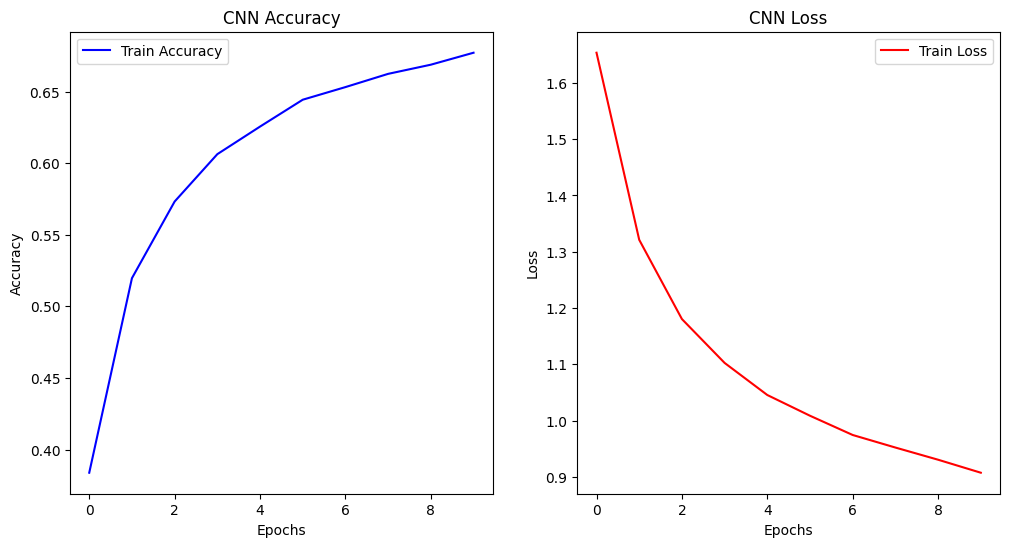

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train Features Shape: (50000, 256)
Test Features Shape: (10000, 256)


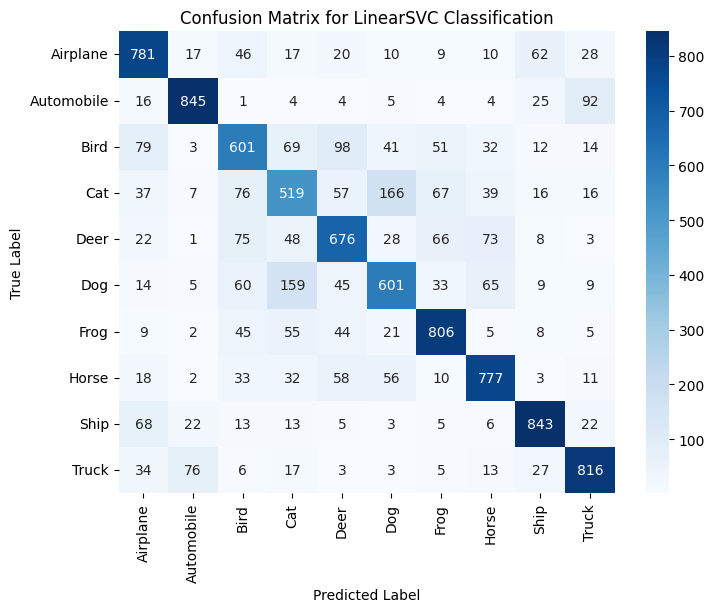

LinearSVC Accuracy: 0.7265


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Flatten

# CIFAR-10 클래스 이름 정의
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# CIFAR-10 데이터셋 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# 원핫 인코딩
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=len(class_names))

# CNN 모델 정의
cnn_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(len(class_names), activation='softmax')  # Class output layer
])

# CNN 모델 컴파일
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# CNN 모델 학습
history = cnn_model.fit(X_train, y_train_onehot, epochs=10)

# CNN 정확도와 손실 함수 시각화
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# CNN 특성 추출
feature_extractor = Sequential(cnn_model.layers[:-1])  # Output layer 제외
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# LinearSVC를 사용한 SVM 학습
svm = LinearSVC()
svm.fit(X_train_features, y_train.ravel())  # y_train.ravel()으로 1D 형태로 변환

# SVM 예측
y_pred = svm.predict(X_test_features)

# 혼동 행렬 계산
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LinearSVC Classification')
plt.show()

# 정확도 출력
accuracy = metrics.accuracy_score(y_test, y_pred)
print("LinearSVC Accuracy:", accuracy)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd drive
%cd MyDrive
%cd 인기초
%ls

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/인기초
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/인기초
[Errno 2] No such file or directory: '인기초'
/content/drive/MyDrive/인기초
flowers-dataset/
